#week11

## Image and Video Segmentation

We want to group objects based on Color, Intensity Motion, or other characteristics. The whole is greater than the sum of the components. That's valid for humans, but for machines it is a much more complex problem. The main Task is to divide an image into constituent "meaningful" [color, texture, motion] regions. Here there are many challenges, therefore we should look at the scope of this segmentation. The approaches presented are basd on Intensity Discontuinity [edge-based segmentation], Intensity Similarity [Thresholding, Region growing, Region Splitting and merging] and Morphology. Other Methods will be studied here.

### Methods Based on Intensity Discontuinity

Some algorithms are based on the Edge Detection. We have Gradient Based Approaches, like Sobel, Prewitt, Roberts. Othe algorithms use Laplacian-Based Approaches (second derivatives) as the Marr-Hildreth algorithm. Moreover, we will focus on Canny Algorithm. 

We can, in general, focus on the MAX/min of the first Derivative of a signal. In case of the second derivative, it's the Zero-crossing that indicates the location of an edge.

Let's introduce the gradient operator:

$$
g_x(n_1,n_2) = \nabla x(n_1,n_2) = \left[ \begin{matrix}
   \frac{\partial x (n_1,n_2)}{\partial n_1}  \\
   \frac{\partial x (n_1,n_2)}{\partial n_2}
   \end{matrix} \right] = \left[ \begin{matrix}
   g_1 (n_1,n_2) \\
   g_2 (n_1,n_2)
   \end{matrix} \right]
$$

The magnitude and angle are respectively:

$$
M(n_1,n_2) = |g_x(n_1,n_2)|= \left( \left( \frac{\partial x (n_1,n_2)}{\partial n_1} \right)^2 + \left( \frac{\partial x (n_1,n_2)}{\partial n_2} \right)^2 \right) ^{0.5} 
$$

and

$$
\alpha (n_1,n_2) = \arctan \left[ \frac{g_2(n_1,n_2)}{g_1(n_1,n_2)} \right]
$$

How do we find the gradient? We approximate partial derivatives with Neighborhood differences, i.e. LSI filters such as:

$$
g_1(n_1,n_2) = x(n_1, n_2) * * h_1(n_1,n_2) \hspace{2cm} g_2(n_1,n_2) = x(n_1, n_2) * * h_2(n_1,n_2)
$$

Here are some examples of $h_1$ and $h_2$ that will approximate the partial dericative in one and the other direction.

This is Roberts (first graph is the difference):

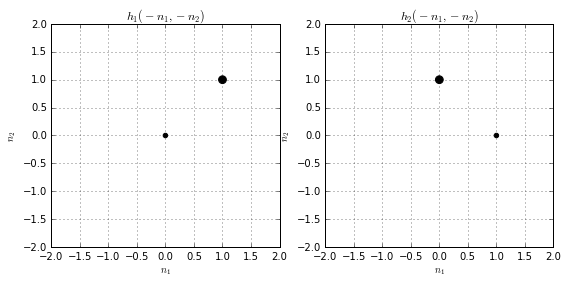

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# h(n1,n2)
h1n1 = np.array([0, 1])
h1n2 = np.array([0, 1])
h1   = [-1., 1.]
h2n1 = np.array([1, 0])
h2n2 = np.array([0, 1])
h2 = np.array([-1, 1])

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
ax.scatter(h1n1,h1n2, c='k',s=[(x+2)*20 for x in h1] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_1(-n_1,-n_2)$')
plt.grid('on')
ax1=plt.subplot(1, 2, 2)
ax1.scatter(h2n1,h2n2, c='k',s=[(x+2)*20 for x in h2] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_2(-n_1,-n_2)$')
plt.grid('on')


This is Sobel:

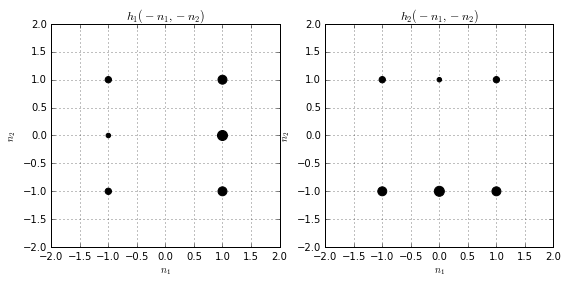

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# h(n1,n2)
h1n1 = np.array([-1, 1, -1, 1, -1, 1])
h1n2 = np.array([-1, -1, 0, 0, 1, 1])
h1   = np.array([-1., 1., -2, 2, -1, 1])
h2n1 = np.array([-1, -1, 0, 0, 1, 1])
h2n2 = np.array([-1, 1, -1, 1, -1, 1])
h2 = np.array([1., -1., 2, -2, 1, -1])

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
ax.scatter(h1n1,h1n2, c='k',s=[(x+3)*20 for x in h1] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_1(-n_1,-n_2)$')
plt.grid('on')
ax1=plt.subplot(1, 2, 2)
ax1.scatter(h2n1,h2n2, c='k',s=[(x+3)*20 for x in h2] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_2(-n_1,-n_2)$')
plt.grid('on')


This is Prewitt:

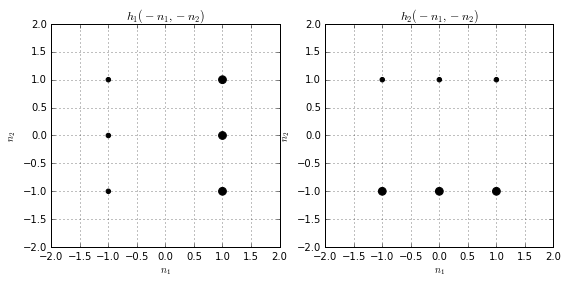

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# h(n1,n2)
h1n1 = np.array([-1, 1, -1, 1, -1, 1])
h1n2 = np.array([-1, -1, 0, 0, 1, 1])
h1   = np.array([-1., 1., -1, 1, -1, 1])
h2n1 = np.array([-1, -1, 0, 0, 1, 1])
h2n2 = np.array([-1, 1, -1, 1, -1, 1])
h2 = np.array([1., -1., 1, -1, 1, -1])

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
ax.scatter(h1n1,h1n2, c='k',s=[(x+2)*20 for x in h1] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_1(-n_1,-n_2)$')
plt.grid('on')
ax1=plt.subplot(1, 2, 2)
ax1.scatter(h2n1,h2n2, c='k',s=[(x+2)*20 for x in h2] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h_2(-n_1,-n_2)$')
plt.grid('on')


Sobel and Prewitt have filters to detect oblique edges too.

In a system for Edge Detection, we have an image $x(n_1,n_2)$ we calculate the derivatives and it's magnitudes, which are compared with the threshold. If the threshold is found, an Edge Thinning algorithm is applied, which leads to an Edge Map.

This is an example with Sobel Horizontal and Vertical:

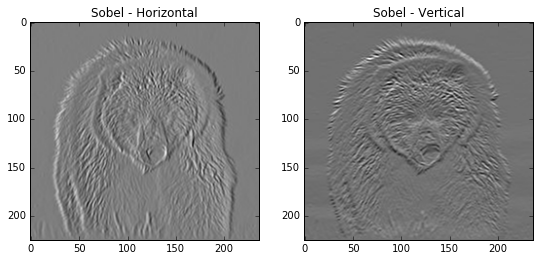

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters
from scipy import signal, misc, ndimage
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

I_sobel_h = filters.sobel_h(Ig)
I_sobel_v = filters.sobel_v(Ig)
I_roberts = filters.roberts(Ig)
I_prewitt_h = filters.prewitt_h(Ig)
I_prewitt_v = filters.prewitt_v(Ig)

# !!! Horizontal and Vertical definitions are switched compared to Aggelos Definitions...

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(I_sobel_v,cmap='gray')
plt.title('Sobel - Horizontal')

ax1=plt.subplot(1, 2, 2)
plt.imshow(I_sobel_h,cmap='gray')
plt.title('Sobel - Vertical')


If we take the Laplacian into account, we get:

$$
\nabla^2 x(n_1,n_2) = \frac{\partial^2 x(n_1,n_2)}{\partial n^2_1} + \frac{\partial^2 x(n_1,n_2)}{\partial n^2_2}
$$

and

$$
L(n_1,n_2) = x(n_1,n_2) * * h_1(n_1,n_2) * * h_1'(n_1,n_2) + x(n_1,n_2) * * h_2(n_1,n_2) * * h_2'(n_1,n_2) = x(n_1, n_2) * * (h_1(n_1,n_2) * * h_1'(n_1,n_2) + h_2(n_1,n_2) * * h_2'(n_1,n_2) ) = x(n_1, n_2) * * h(n_1,n_2)
$$

Graphically, the Laplacian Kernel looks like this one:

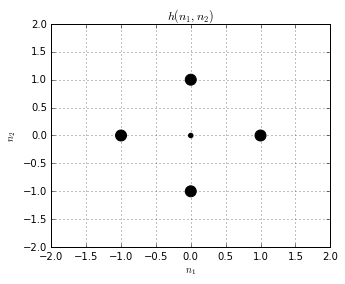

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# h(n1,n2)
h1n1 = np.array([0, -1, 0, 1, 0])
h1n2 = np.array([-1, 0, 0, 0, 1])
h1   = np.array([1., 1., -4, 1, 1])

fig=plt.figure(figsize=(5, 4))
ax=plt.subplot(1, 1, 1)
ax.scatter(h1n1,h1n2, c='k',s=[(x+5)*20 for x in h1] )
plt.xlabel('$n_1$'); plt.ylabel('$n_2$')
plt.xlim([-2,2]); plt.ylim([-2,2]);
plt.title('$h(n_1,n_2)$')
plt.grid('on')


In a system for Edge Detection, we have an image $x(n_1,n_2)$ we calculate the laplacian and it's magnitudes, for which we check zero-crossings. Also, we calculate the local variance to be greatest than a threshold. This will lead to an Edge Point.

This is an example.

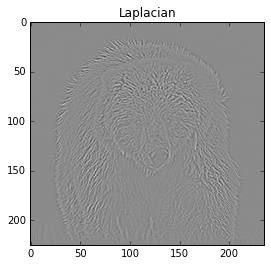

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters
from scipy import signal, misc, ndimage
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

I_laplacian = filters.laplace(Ig)

fig=plt.figure(figsize=(10, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(I_laplacian,cmap='gray')
plt.title('Laplacian')


Intensity changes occur at different scales, therefore we should band limit first. In band-limiting the image, a Gaussian Filter can be used, where the variance of the Gaussian can be used as threshold:

$$
h(x,y) = e^{-\frac{x^2+y^2}{2\pi \sigma^2}}
$$

Edges are detected then. If the Laplacian is used, I can convolve the image with the Laplacian of the Gaussian, or LoG. This can also be computed analytically. If I use different $\sigma$, we get the following:

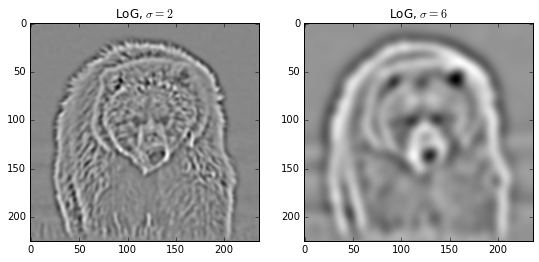

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters
from scipy import signal, misc, ndimage
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

I_gauss2 = filters.gaussian(Ig, sigma=2)
I_gauss6 = filters.gaussian(Ig, sigma=6)
I_laplacian2 = filters.laplace(I_gauss2)
I_laplacian6 = filters.laplace(I_gauss6)

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(I_laplacian2,cmap='gray')
plt.title('LoG, $\sigma=2$')

ax1=plt.subplot(1, 2, 2)
plt.imshow(I_laplacian6,cmap='gray')
plt.title('LoG, $\sigma=6$')


Another popular and effective technique is the Canny Edge Detector. It consist of three steps:
- smooth image with gaussian filter to eliminate noise
- compute the gradient magnitude and angle
- apply non-maximal suppression to the gradient magnitude image (by using the angle). Then use double thresholding

We don't want to be strict in performing non-maximal suppression. For this reasons, we denote 4 basic edge directions: horizontal, -45, + 45, vertical edge directions. For every point, we find a direction $d_k$ that is closest to $\alpha(n_1, n_2)$. If the magnitude $M(n_1,n_2)$ is less than at least one of its neighboors, we suppress it. The problem of this type of filters is that edge pixels are not linked. Therefore, we define a Double Thresholding $T_H$ and $T_L$. We first find strong pixels and then weak pixels to link to the strong ones.


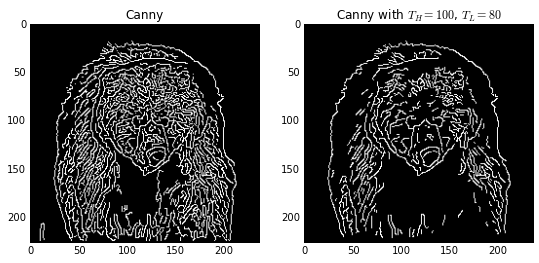

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature
from scipy import signal, misc, ndimage
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

I_canny1 = feature.canny(Ig, sigma=1.0)
I_canny2 = feature.canny(Ig, sigma=1.0, low_threshold=80, high_threshold=100)

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(I_canny1,cmap='gray')
plt.title('Canny')

ax1=plt.subplot(1, 2, 2)
plt.imshow(I_canny2,cmap='gray')
plt.title('Canny with $T_H=100$, $T_L=80$')

To complete straight edges as pointed out by the use of Canny Transform, we use now the Hough Transform for which we can parametrise the image. The procedure is:
- Obtain a binary edge image using any technique
- Quantify the $\rho \Theta$ - plane
- Examine the number of intersects at each cell in the $\rho \Theta$ - plane (if the number is substantial, we get a line the plane)
- We bridge the gap based on continuity

If the length is smaller then a threshold, we  we findd our solution.

### Methods Based on Intensity Similarity

These are Thresholding techniques, based on regions. They are clear and simple to implement. We usually have two classes, divided by a threshold $T$ that allows for object and background class. The method can be extended with multiple classes. Of course $T$ is quite critical.

That's an example:


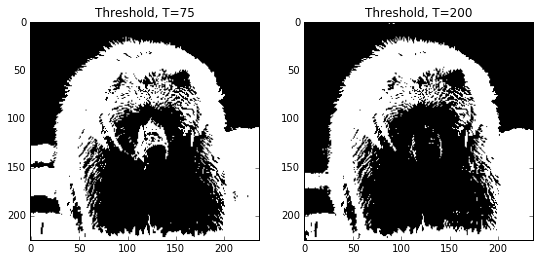

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature
from scipy import signal, misc, ndimage
import numpy as np
import os

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

I_threshold100 = filters.rank.threshold(Ig, Ig>=75)
I_threshold200 = filters.rank.threshold(Ig, Ig>=200)

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(I_threshold100,cmap='gray')
plt.title('Threshold, T=75')

ax1=plt.subplot(1, 2, 2)
plt.imshow(I_threshold200,cmap='gray')
plt.title('Threshold, T=200')

The drawback is that the regions are disconnected. Let's see Otsu's method. The global optimal threshold is found by maximizing the between-class variance. Only the histogram is required for this. So the steps are:
- Find the histogram, with probability $p_i$ and $L$ different Levels. 
- We use threshold $k$
- The optimal value is obtained when the between-class variance is maximized.

We can calculate $P$ up to $L=k$ and $P$ from $k$ to $L$. 

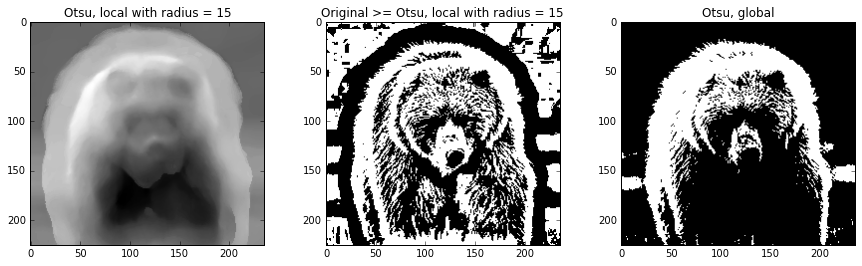

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature, morphology
from scipy import signal, misc, ndimage
import numpy as np
import os

# this example is widely inspired by 
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html#sphx-glr-auto-examples-xx-applications-plot-thresholding-py

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

radius1 = 15
selem1 = morphology.disk(radius1)

local_otsu = filters.rank.otsu(Ig, selem1)
or_local_otsu = Ig >= local_otsu
threshold_global_otsu = filters.threshold_otsu(Ig)
global_otsu = Ig >= threshold_global_otsu

fig=plt.figure(figsize=(15, 4))
ax=plt.subplot(1, 3, 1)
plt.imshow(local_otsu,cmap='gray')
plt.title('Otsu, local with radius = 15')

ax1=plt.subplot(1, 3, 2)
plt.imshow(or_local_otsu,cmap='gray')
plt.title('Original >= Otsu, local with radius = 15')

ax2=plt.subplot(1, 3, 3)
plt.imshow(global_otsu,cmap='gray')
plt.title('Otsu, global')

We will discuss techniques based on finding the regions directly. If $R$ is the entire image Region, we want that:
- The segmentation should be complete: every pixel is in one region
- Points in the region are connected
- The Region must be disjoint (intersection is null)
- All pixels in $R_i$ respect a certain predicate
- Adjacent Regions are different

Region Growing is a procedure that groups pixels into a Region. We start from seed-points from where Regions grow. We must define the way how to select seed-points (manually, or clustering the points and finding centroids). Features that can be used to get the Similarity Matrix are Color, moments, textures,... 

An alternative to Region Growing is Region Splitting, and Region Merging. In Region Splitting, we will use a quad-tree approach. With Merging, two Regions are merged if two Regions both respect a certain predicate.



###Watersheds and K-Means Algorithms

If we take an image as a valley, and assume water starts pouring from the top of the mountain, we want to detect such watershed. Since this brings to over-segmentation, some techniques are used afterwards. Our gray image is a topological surface. There are three type of points in the image:
- Regional Minimum
- Cathcment basins
- Ridge lines (Watershed lines)

The objective is to find such watershed lines, by building a "dam", so that no more dams are left to be built. In this way we separate an object with the next one. Here is an example:


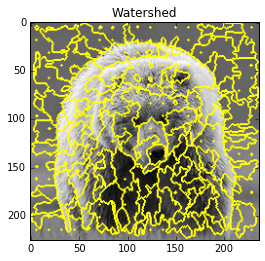

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature, morphology, segmentation, util
from scipy import signal, misc, ndimage
import numpy as np
import os

# this example is widely inspired by 
# http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html?highlight=watershed

I = misc.imread(os.path.join('media','bear.png') );
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

gradient = filters.sobel(Ig)
grid = util.regular_grid(Ig.shape, n_points=300)
seeds = np.zeros(Ig.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

segments_watershed = morphology.watershed(gradient, seeds) # in further versions compactness can be used...

fig=plt.figure(figsize=(9, 4))
ax=plt.subplot(1, 2, 1)
plt.imshow(segmentation.mark_boundaries(Ig,segments_watershed),cmap='gray')
plt.title('Watershed')


To solve over-segmentaion, we can use markers to specify the only allowed regional minima. About Internal Markers:
- each one corresponds to an object
- surrounded by high altitude points
- points in a region form a connected component
- all points in connected components have the same intensity

As per External Markers:
- they should partition the image into regions where the regional minima are allowed to locate

Another way to perform segmentation, is by using K-Means Clustering (iterative procedure - repeat until convergence). The goal is to classify all data points into K different clusters, number of K defined by the user. The way we find the centroid it is just by finding the center of a uniformly distributed distribution. There are many applications of K-Means clustering, as with MRIs.

Here is an example of K_Means Clustering:

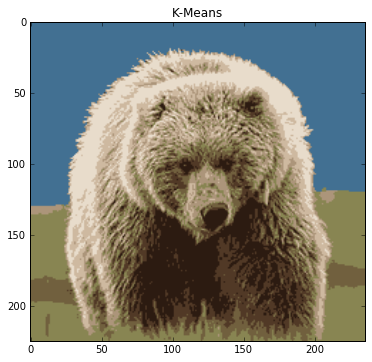

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import filters, feature, morphology, segmentation, util
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from scipy import signal, misc, ndimage
import numpy as np
import os

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

n_classes = 8

I = misc.imread(os.path.join('media','bear.png') )/255.;
Ig = misc.imread(os.path.join('media','bear.png'), mode='L')
x = np.array(range(np.size(I,0))); y = np.array(range(np.size(I,1)))
X,Y = np.meshgrid(y,x)

w, h, d = original_shape = tuple(I.shape)
assert d == 3
image_array = np.reshape(I, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)
kmeans = KMeans(n_clusters=n_classes, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

fig=plt.figure(figsize=(6, 6))
ax=plt.subplot(1, 1, 1)
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h),cmap='gray')
plt.title('K-Means')


###Advanced Methods

Extracting objects from background: easy cue for humans and animals. Tough for machines. This is the Motion-based Segmentation, as we want to group objects with the same motion properties. Given an image sequence, we determine:
- Number of Motion models
- Motion Model
- Segmentation

Some applications are object detection, surveillance, tracking, robotics, image and video compression, video editing...

A basic approach is based on threshold, just by looking at the images:

$$
d_{i,j}(x,y)= \{ \begin{matrix} 
   1 & if & |f(x,y,i)-f(x,y,j)| > T  \\
   0 & otherwise & 
   \end{matrix}
$$

Object motions result in ones in $d_{i,j}$. Assumptions are:
- images registered spatially
- Relatively constant illumination

An improvement is the Accumulative Difference image (ADI), from where we get Absolute, Positive (for the size), Negative (for motion direction). This ignores changes that occur sporadically.

A very much used technique is the Mean Shift: we start with a region of interest in the multi-dimensional space, and we move it to the new center of mass and keep going in this way until we land in a particular area. 

Another current approach is Graph Cut: an image can be represented as a graph. Pixels are vertices. Pairs of pixels correspond to Edges. Similarities between pixels correspond to weight/costs $C$. Which edges shall we cut then? Of course, the ones with Low cost. An example is the so-called st-Mincut Problem, where st stands for source-termination. In order to solve it automatically, we use the Max-Flow Theorem (dual max-flow problem). We should push the maximum flow to the network, and we calcolate the capacity, but subtracting the flow we subtract